In [1]:
import pandas as pd
import numpy as np
import datetime as dt

df = pd.read_csv(r'C:\Users\imffb\project\EDA\car\AllData_new_used.csv',low_memory=False)
df = df.drop(columns=['Unnamed: 0'])
df['year_month'] = pd.to_datetime(df['scraped_first_time'].str.split('-').str[:2].str.join('-'), format='%Y-%m').dt.strftime('%Y-%m')

df['new=0, certified=1, used=2'] = np.where((df['new=0, certified=1, used=2']=='Published') & (df['kilometers'] < 200), '0', df['new=0, certified=1, used=2'])
df['new=0, certified=1, used=2'] = np.where((df['new=0, certified=1, used=2']=='Published') & (df['kilometers'] >= 200), '2', df['new=0, certified=1, used=2'])
df['new=0, certified=1, used=2'] = np.where((df['new=0, certified=1, used=2']=='Sold') & (df['kilometers'] < 200), '0', df['new=0, certified=1, used=2'])
df['new=0, certified=1, used=2'] = np.where((df['new=0, certified=1, used=2']=='Sold') & (df['kilometers'] >= 200), '2', df['new=0, certified=1, used=2'])
df['new=0, certified=1, used=2'] = df['new=0, certified=1, used=2'].str.replace('Certified Pre-Owned', '1').astype(float)
df_new = df[df['new=0, certified=1, used=2'] < 1]
df_used = df[df['new=0, certified=1, used=2'] >= 1]

display(df)

,scraped_first_time,make,model,year,kilometers,price,province,City,Vehicle_information.transmission,Vehicle_information.drivetrain,Vehicle_information.body_style,Vehicle_information.exterior_colour,Vehicle_information.fuel_type,Vehicle_information.trim,"new=0, certified=1, used=2",year_month
0,2021-05-17,Volkswagen,Jetta,2019,74277,18840,British Columbia,Abbotsford,Automatic,FWD,Sedan,White,Gas,Comfortline,2.0,2021-05
1,2020-12-16,Volkswagen,Arteon,2021,123,54845,British Columbia,Maple Ridge,Automatic,AWD,Sedan,Silver,Gas,Execline,0.0,2020-12
2,2021-06-16,Toyota,Highlander,2019,39278,42888,British Columbia,Duncan,Automatic,AWD,Suv,Black,Gas,Xle,2.0,2021-06
3,2021-07-08,Chevrolet,Tahoe,2021,40,74143,Saskatchewan,Saskatoon,Automatic,4WD,Suv,Black,Diesel,Rst,0.0,2021-07
4,2021-07-09,Jeep,Compass,2018,37072,27999,Manitoba,Winnipeg,Automatic,4WD,Suv,Grey,Gas,Trailhawk,2.0,2021-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187193,2022-10-20,Acura,Rdx,2022,15,54180,Alberta,Edmonton,Automatic,AWD,Suv,Black,Gas,Tech,0.0,2022-10
1187194,2022-10-20,Acura,Rdx,2021,54641,53995,Alberta,Red Deer,Automatic,AWD,Suv,Black,Gas,A Spec,2.0,2022-10
1187195,2022-10-20,Acura,Rdx,2021,46700,51999,Alberta,Edmonton,Automatic,AWD,Suv,Silver,Gas,A Spec,2.0,2022-10
1187196,2022-10-20,Acura,Rdx,2019,46828,46499,Manitoba,Winnipeg,Automatic,AWD,Suv,Black,Gas,A Spec,2.0,2022-10


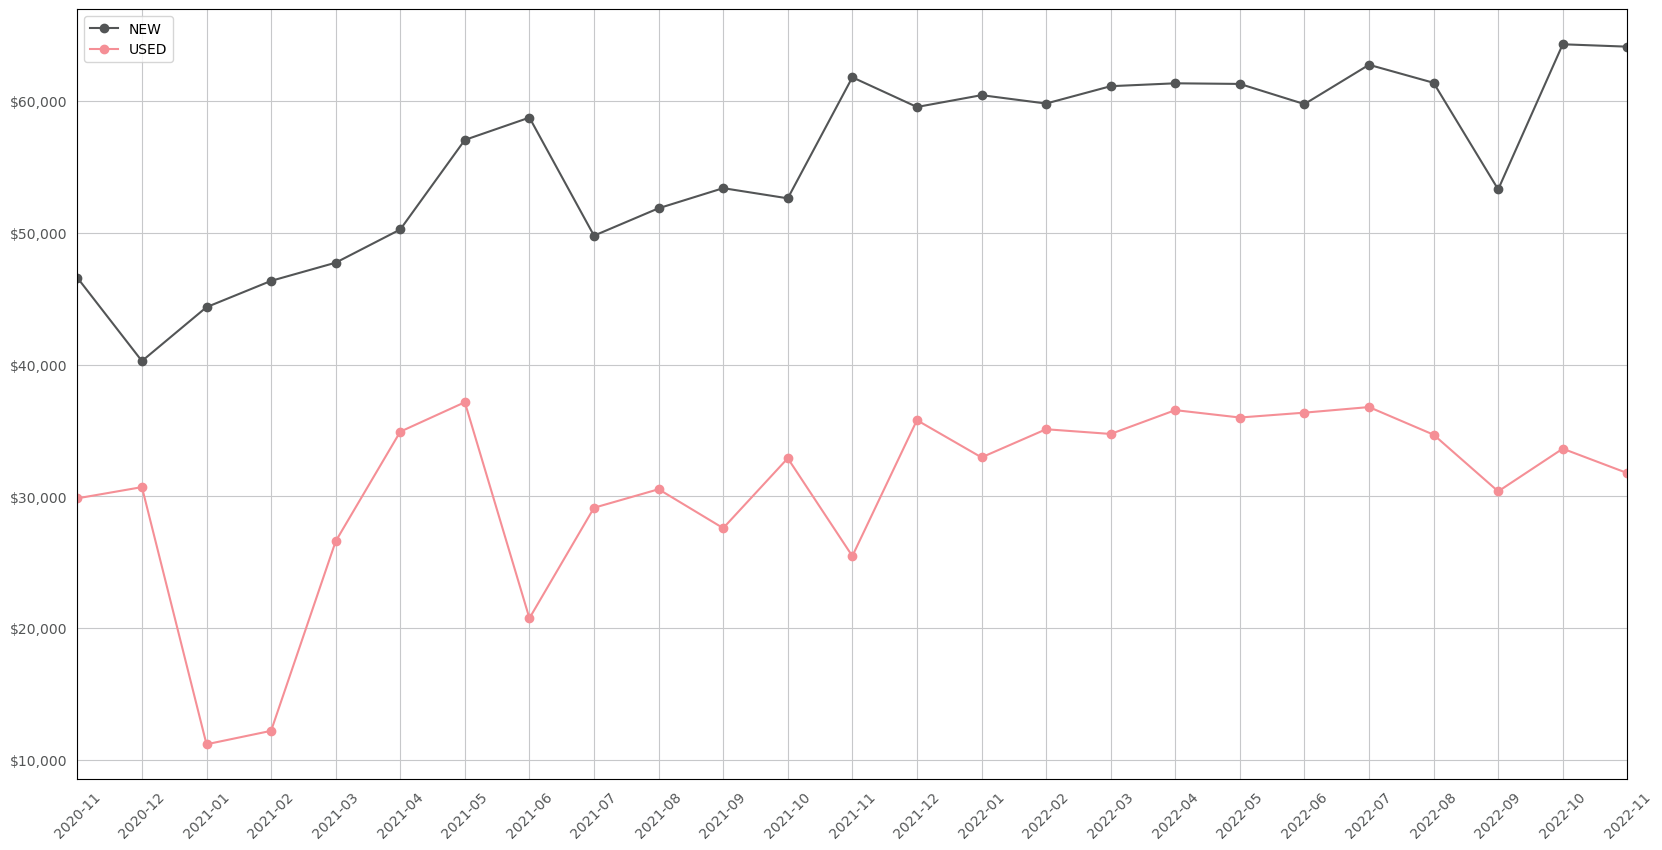

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import statistics

#New and used cars mean price by month

df_new_prices = df_new.groupby('year_month')['price'].mean().to_frame().reset_index()
df_used_prices = df_used.groupby('year_month')['price'].mean().to_frame().reset_index()

fig, ax = plt.subplots(figsize=(20, 10))

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=False, right=False)
plt.grid(axis='y', color='#c7c8ca')
plt.grid(axis='x', color='#c7c8ca')
plt.plot(df_new_prices['year_month'].values, df_new_prices['price'].values, marker='o', color='#535556', label='NEW')
plt.plot(df_used_prices['year_month'].values, df_used_prices['price'].values, marker='o', color='#f58f96', label='USED')
plt.xticks(rotation = 45, color='#535556')
plt.yticks(color='#535556')
ax.margins(x=0)
plt.xticks(df_new_prices['year_month'].values)
plt.legend()
plt.show()

In [3]:
from datetime import datetime

df_x = pd.DataFrame(columns=['Descriptor','New','Used']).set_index('Descriptor')

#%MOM for most recent month
this_month = datetime.now().strftime("%B")
df_x.loc[f'TOTAL %MOM {this_month}','New'] = 100 * (df_new_prices['price'].values[-1] - df_new_prices['price'].values[-2]) / df_new_prices['price'].values[-2]
df_x.loc[f'TOTAL %MOM {this_month}','Used'] = 100 * (df_used_prices['price'].values[-1] - df_used_prices['price'].values[-2]) / df_used_prices['price'].values[-2]

#%YOY for 2022-2021
year_averages1 = df_new.groupby(pd.PeriodIndex(df_new['year_month'], freq='Y'))['price'].mean()
year_averages2 = df_used.groupby(pd.PeriodIndex(df_used['year_month'], freq='Y'))['price'].mean()
df_x.loc['TOTAL %YOY 2022-2021','New'] = '{:.2f}'.format((year_averages1.loc['2022'] / year_averages1.loc['2021'] - 1)*100)
df_x.loc['TOTAL %YOY 2022-2021','Used'] = '{:.2f}'.format((year_averages2.loc['2022'] / year_averages2.loc['2021'] - 1)*100)

#Current month average
df_x.loc['CURRENT MONTH AVERAGE', 'New'] = df_new_prices['price'].values[-1]
df_x.loc['CURRENT MONTH AVERAGE', 'Used'] = df_used_prices['price'].values[-1]

display(df_x)

,New,Used
Descriptor,,
TOTAL %MOM November,-0.282104,-5.514723
TOTAL %YOY 2022-2021,13.42,22.89
CURRENT MONTH AVERAGE,64145.256637,31773.22139


In [4]:
df_x = pd.DataFrame(columns=['Descriptor','New','Used']).set_index('Descriptor')

#Avg, MOM, YOY for each body style

last_month = dt.date.today().replace(day=1).strftime("%Y-%m")
last_last_month = (dt.date.today().replace(day=1) - dt.timedelta(days=1)).strftime("%Y-%m")

#df_new['Vehicle_information.body_style'] = df_new['Vehicle_information.body_style'].replace(['Sedan', 'Coupe', 'Hatchback', 'Wagon', 'Convertible'],  'Car').replace('Pickup','Truck')
#df_used['Vehicle_information.body_style'] = df_used['Vehicle_information.body_style'].replace(['Sedan', 'Coupe', 'Hatchback', 'Wagon', 'Convertible'],  'Car').replace('Pickup','Truck')

for n in ['New','Used']:
    if n == 'New':
        df_n = df_new.copy()
    elif n == 'Used':
        df_n = df_used.copy()

    for body in df_n['Vehicle_information.body_style'].unique():
        if n == 'New':
            df_n = df_new[df_new['Vehicle_information.body_style']==body].copy()
        elif n == 'Used':
            df_n = df_used[df_used['Vehicle_information.body_style']==body].copy()
        year_averages = df_n.groupby(pd.PeriodIndex(df_n['year_month'], freq='Y'))['price'].mean()
        pre_month_avg = df_n[df_n['year_month']==last_last_month]['price'].mean()
        cur_month_avg = df_n[df_n['year_month']==last_month]['price'].mean()
        
        if n == 'New':
            df_n = df_new[df_new['year_month']==last_month].copy()
        elif n == 'Used':
            df_n = df_used[df_used['year_month']==last_month].copy()           
        df_n = df_n[df_n['Vehicle_information.body_style']==body]
        
        df_x.loc['{} average - {}'.format(body.upper(), datetime.strptime(last_month, "%Y-%m").strftime("%B")), n] = '{:.2f}'.format(df_n['price'].mean())
        df_x.loc['{} %MOM {}-{}'.format(body.upper(), datetime.strptime(last_last_month, "%Y-%m").strftime("%b"), datetime.strptime(last_month, "%Y-%m").strftime("%b")), n] = 100 * (cur_month_avg - pre_month_avg) / pre_month_avg
        df_x.loc['{} %YOY 2022-2021'.format(body.upper()), n] = '{:.2f}'.format((year_averages.loc['2022'] / year_averages.loc['2021'] - 1)*100)

display(df_x)

,New,Used
Descriptor,,
SEDAN average - November,34758.00,24821.50
SEDAN %MOM Oct-Nov,-8.691666,-1.408482
SEDAN %YOY 2022-2021,11.24,36.19
SUV average - November,63422.02,33671.41
SUV %MOM Oct-Nov,8.763355,-3.21911
SUV %YOY 2022-2021,9.18,19.01
VAN/MINIVAN average - November,57288.80,28764.27
VAN/MINIVAN %MOM Oct-Nov,-4.158743,1.03399
VAN/MINIVAN %YOY 2022-2021,15.37,30.54


In [6]:
#By body style bar plot

#fig, ax = plt.subplots(figsize=(20, 10))
#df_new.plot.bar
#ax.bar(df_new['Vehicle_information.body_style'].unique(), [1,1,1,1])

#plt.show()

In [8]:
df_x = pd.DataFrame(columns=['Descriptor','New','Used']).set_index('Descriptor')

#Avg, MOM, YOY by 5 main provinces [BC, AB< ON, MB, QC]

for n in ['New','Used']:
    if n == 'New':
        df_n = df_new.copy()
    elif n == 'Used':
        df_n = df_used.copy()

    #for province in df_n['province'].unique():
    for province in ['British Columbia', 'Alberta', 'Manitoba', 'Ontario', 'Quebec']:
        if n == 'New':
            df_n = df_new[df_new['province']==province].copy()
        elif n == 'Used':
            df_n = df_used[df_used['province']==province].copy()
        year_averages = df_n.groupby(pd.PeriodIndex(df_n['year_month'], freq='Y'))['price'].mean()
        pre_month_avg = df_n[df_n['year_month']==last_last_month]['price'].mean()
        cur_month_avg = df_n[df_n['year_month']==last_month]['price'].mean()
        
        if n == 'New':
            df_n = df_new[df_new['year_month']==last_month].copy()
        elif n == 'Used':
            df_n = df_used[df_used['year_month']==last_month].copy()           
        df_n = df_n[df_n['province']==province]
        
        df_x.loc['{} average - {}'.format(province.upper(), datetime.strptime(last_month, "%Y-%m").strftime("%B")), n] = '{:.2f}'.format(df_n['price'].mean())
        df_x.loc['{} %MOM {}-{}'.format(province.upper(), datetime.strptime(last_last_month, "%Y-%m").strftime("%b"), datetime.strptime(last_month, "%Y-%m").strftime("%b")), n] = 100 * (cur_month_avg - pre_month_avg) / pre_month_avg
        df_x.loc['{} %YOY 2022-2021'.format(province.upper()), n] = '{:.2f}'.format((year_averages.loc['2022'] / year_averages.loc['2021'] - 1)*100)

display(df_x)

,New,Used
Descriptor,,
BRITISH COLUMBIA average - November,70094.94,35357.49
BRITISH COLUMBIA %MOM Oct-Nov,6.180288,-5.851086
BRITISH COLUMBIA %YOY 2022-2021,14.39,19.28
ALBERTA average - November,70924.56,33811.15
ALBERTA %MOM Oct-Nov,7.890226,-3.181565
ALBERTA %YOY 2022-2021,14.16,12.30
MANITOBA average - November,56548.24,29900.42
MANITOBA %MOM Oct-Nov,-11.006807,-11.029562
MANITOBA %YOY 2022-2021,9.29,14.31


In [19]:
df_new.loc[(df_new['province']=='Quebec') & (df_new['year_month']=='2022-10')]

,scraped_first_time,make,model,year,kilometers,price,province,City,Vehicle_information.transmission,Vehicle_information.drivetrain,Vehicle_information.body_style,Vehicle_information.exterior_colour,Vehicle_information.fuel_type,Vehicle_information.trim,"new=0, certified=1, used=2",year_month
239436,2022-10-02,Ram,1500 Classic,2022,0,60865,Quebec,Saint-Hyacinthe,Automatic,4WD,Pickup,Pearl,Gas,Express,0.0,2022-10
239504,2022-10-13,Chevrolet,Malibu,2022,45,32643,Quebec,Blainville,Automatic,FWD,Sedan,White,Gas,Lt,0.0,2022-10
239527,2022-10-19,Ford,Edge,2022,15,62914,Quebec,Beauceville,Automatic,AWD,Suv,Black,Gas,St,0.0,2022-10
